In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
"""
In this notebook, we will be exploring the data of Breast Cancer (breast cancer wisconsin) and perform Exploratory Data Analysis (EDA) on it. 
moreover we will be performing some Machine Learning (ML) on the data. 
This problem is classifiecation problem where we are trying to predict whether a patient has cancer or not. 
"""

In [ ]:
data = pd.read_csv('data.csv')
data.head()

In [ ]:
data.drop(columns=[col for col in data.columns if col.startswith('Unnamed:')], inplace=True)

data.head()

In [ ]:
data.columns

In [ ]:
#The info function is used to check if the data is missing or not and to see the data type of the column.
data.info()

In [ ]:
#The describe function is used to check the mean, standard deviation, min, max, etc. of the data.
data.describe()

In [ ]:
#we can see that there are no missing values in the dataframe
data.isna().sum()

In [ ]:
data.shape
#meaning there are 569 rows and 32 columns in the dataframe, in our case we have 568 patients and 31 features.

In [ ]:
data['diagnosis'].value_counts()
#we can see that there are only two classes in the data, namely, benign and malignant.

In [ ]:
#change the diagnosis column to numerical values for better analysis, we can either do that or using one-hot encoding technique.
"""one hot encoding technique is used to convert categorical data to numerical data by creating a new column for each category and assigning 1 or 0 to each column.
because we have onlt 2 classes, we don't need to use one-hot encoding technique, we can simply use the following code. 

if will decide to use one-hot encoding technique, we will have 2 new columns in our dataframe and becuse of something called the dummy variable trap, we have to drop one column of the dummy variable.
meaning we will still have one column associated with the diagnosis column. 
(just wanted to show that we can use one-hot encoding technique and this technique and will get the same result as we did without using one-hot encoding technique)"""

data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})
data['diagnosis'].head()

In [ ]:
##check if we have object type 
"""since we don't have object columns, we don't need to encode them by using label encoding"""
data.select_dtypes(include=['object']).columns

Visualize the data using the following methods: 
1. Histogram
2. Boxplot
3. Scatterplot
4. Correlation matrix using Heatmap
5. Pairplot


In [ ]:
#check how many observations are in each class (diagnosis)
plt.figure(figsize=(10,5))
sns.countplot(x='diagnosis', data=data)

In [ ]:
plt.figure(figsize=(20,15))
data_malignant = data.loc[data['diagnosis'] == 1]
data_malignant.hist(bins=50, figsize=(20,15))

"""
Here we can see the distribution of the data. 
In most of the cases, the data is not normally distributed.
"""

In [ ]:
""" Heatmap helps us to visualize the correlation between the variables. 
in this case, we choose only the malignant data to visualize the correlation between the variables.
Heatmap is based on Pearson correlation coefficient. 
Pearson correlation coefficient is a statistical measure of the linear relationship between two variables. 
The Pearson correlation is also known simply as the correlation coefficient. The Pearson correlation coefficient can range from -1 to 1.
"""
plt.figure(figsize=(20,15))
# data_malignant = data.loc[data['diagnosis'] == 1]
sns.heatmap(data.corr(), annot=True)

In [ ]:
#We want to check the correlation between the variables and the target variable.
data.corrwith(data['diagnosis']).sort_values(ascending=False).head(10)

In [ ]:
data.corrwith(data['diagnosis']).sort_values(ascending=False).head(10).plot.bar(figsize=(10,10), title='Correlation with target variable')


In [ ]:
##pairplot to visualize the data. pair plot is a plot that shows the distribution of the data in all the variables. 
plt.figure(figsize=(10,10))
cols = ['diagnosis', 'concave points_worst', 'perimeter_worst',
    'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
    'radius_mean', 'area_mean', 'concavity_mean']
sns.pairplot(data[cols], hue='diagnosis')

In [ ]:
##implemtneting boxplot to visualize the data. 
cols = ['concave points_worst', 'perimeter_worst',
    'concave points_mean', 'radius_worst', 'perimeter_mean', 'area_worst',
    'radius_mean', 'area_mean', 'concavity_mean']
plt.figure(figsize=(6,6))
for col in cols:
    sns.boxplot(x='diagnosis', y=col, data=data)
    plt.title(col)
    plt.show()

Implementing Machine Learning Algorithms. 

We are going to solve classification problem using the following algorithms:


1. K-Nearest Neighbors
2. Logistic Regression
3. Random Forest
4. Support Vector Machine
5. Naive Bayes 
6. Xgboost
7. Neural Network


In [ ]:
"""implemnting minmax scaler and standard scaler to normalize the data.
The main idea behind feature scaling is to make the data more similar. The most common techniques of feature scaling are Normalization and Standardization.
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. 
Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling and StandardScaler is usually used prior to model fitting. 
The main idea behind minmax scaler is to scale the data to a range between 0 and 1 in order to make the data easier to learn.
The main advantage of standard scaler is that it is robust to outliers. 
"""


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

x = data.drop('diagnosis', axis=1)
y = data['diagnosis']
#we are splitting the data into train and test data, we will use train data to train the model and test data to test the model. 
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)
#when we normalize the data, we have to do it after the train test split, becuase if not we will have a leak of information.
# For example, it we are using minmax scaler before we split it into train and test data, 
# we might use the min and max of our test to normalize our train data, and that will lead to a leak of information. 
scaler.fit(X_train)
X_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 
X_train = pd.DataFrame(X_scaled, columns=x.columns)
X_test = pd.DataFrame(X_test_scaled, columns=x.columns)

#since we are in classification problem, we dont need to scale the target variable. 

In [68]:
"""implementing KNN algorithm to classify the data
# Knn is a classification algorithm that uses the distance between the data points to classify the data.
knn calculates the distance between the data points and assigns the class of the closest data point.
# A total of 569 such samples are present in this data, out of which 357 are classified as
# "benign" (harmless) and the rest 212 are classified as "malignant" (harmful). {'M':1, 'B':0})"""


knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
acc = accuracy_score(y_test, pred_knn) 
print('Accuracy: %.3f' % acc)

Accuracy: 0.974


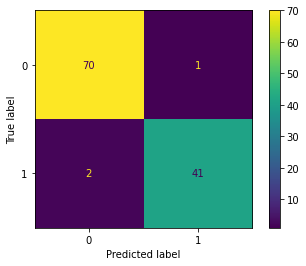

In [69]:
"""confusion matrix to check the accuracy of the algorithm from a different perspective,
the true positive, false positive, true negative and false negative"""
cm = confusion_matrix(y_test, pred_knn, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=knn.classes_)
"""from the confusion martix we can see that we have 70 observation that we predicted to be benign (harmless) and they ended up being benign (harmless), 
# however we have 1 observation that we predicted to be malignant (harmful) and ended up bening benign (harmless)
# Moreover we have 2 observation that we predicted to be benign (harmless) and ended up being malignant (harmful)
# To sum up we have a total of 1 true negatives and a total of 2 false positives"""
disp.plot()

In [70]:
from sklearn.neighbors import KNeighborsRegressor
"""
At K=1, the KNN tends to closely follow the training data and thus shows a high training score. 
However, in comparison, the test score is quite low, thus indicating overfitting.
We can see that the maximum score achives when the n_neighbors is 4 which is the best value for this data set.
"""

knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.813298     1.000000
1    2    0.850639     0.959992
2    3    0.875532     0.946656
3    4    0.883311     0.929398
4    5    0.871549     0.926950
5    6    0.874495     0.918938
6    7    0.865880     0.914701
7    8    0.858223     0.910129
8    9    0.863085     0.903655
9   10    0.848772     0.899556
10  11    0.849713     0.898239
11  12    0.854528     0.890632
12  13    0.858151     0.885643
13  14    0.867975     0.886796
14  15    0.873375     0.886869
15  16    0.874997     0.883065


0.9824561403508771


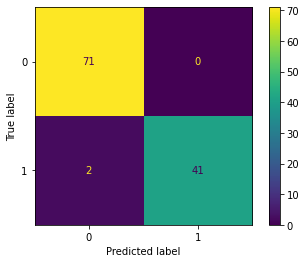

In [71]:
"""implemting logistic regression
logistic regression is a classification algorithm that uses the logistic function to classify the data.
in this case, the logistic function is used to calculate the probability of the being benign (harmless) or malignant (harmful).
"""

lr = LogisticRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)
print(accuracy_score(y_test, pred_lr))

cm = confusion_matrix(y_test, pred_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()


In [ ]:
"""Feature importance 
Feature Importance refers to techniques that calculate a score for all the input features for a given model. 
the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable.

one of the many ways to check feature importance is to check to coeffiecients of the model.
For example, both linear and logistic regression algorithms have a coeffiecient that represents the weight of each feature. 
for each feature if an assigned coefficient is a large (negative or positive) number, it has some influence on the prediction.
On the contrary, if the coefficient is zero, it doesn't have any impact on the prediction.
"""

from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score # r2_score is a function that calculates the r2 score of the model

feutre_importance = permutation_importance(lr, X_test, y_test, n_repeats=10, random_state=42)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr.coef_[0]
})


importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

0.9649122807017544


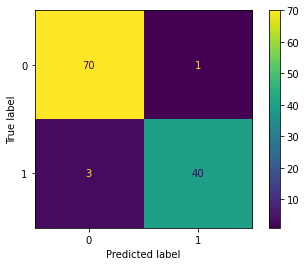

In [72]:
"""
implemting the random forest algorithm. 
Randon Forest is a classification algorithm that uses the decision trees to classify the data.
Random Forest is a meta-algorithm that combines decision trees to create a strong classifier.
Random forest, consists of a large number of individual decision trees that operate as an ensemble. 
Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model's prediction 
"""
##import the random forest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 

rf = RandomForestClassifier(n_estimators=50, max_depth=5)
"""n_estimators is the number of trees that we want to create
max_depth is the maximum depth of the tree, the higher the depth the more complex the tree will be, in this case we set it to 5. 
max_depth should not be set to a very large value, otherwise the tree will be very complex and will not be able to learn a+/nything, and will might cause overfitting
#it's import to notice that our data is scaled using minmax scaler"""

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print(accuracy_score(y_test, pred_rf))

##the results are slightly worse than the results of the logistic regression algorithm, but much better than the results of the KNN algorithm
##let's look at the confusion matrix

cm = confusion_matrix(y_test, pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf.classes_)
disp.plot()

In [ ]:
#implemnting grid search for the random forest algorithm 
from sklearn.model_selection import GridSearchCV 

""" using grid search to find the best parameters for the random forest algorithm. 
grid search is a method that tries different combinations of parameters to find the best one. Here we are trying to find the best parameters for the random forest algorithm.
We will be using the GridSearchCV class from Scikit-learn which accepts possible values for desired hyperparameters and fits separate models on the given data for each combination of hyperparameters. 
"""

grid_cv = GridSearchCV(estimator=rf, param_grid={'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}, scoring='accuracy', cv=2, n_jobs=3)
#n_jobs is the number of jobs to run in parallel, -1 means all available CPUs
#cv is the number of folds that we want to use for the cross validation 

#since it takes a long time to run, we will be using few options to speed up the process (n_jobs, cv)

In [ ]:
# print(grid_cv.best_params_) #the best parameters for the random forest algorithm 
# print(grid_cv.best_score_) #the best score for the random forest algorithm

In [ ]:
print(classification_report(y_test, pred_rf)) 

In [ ]:
##Random Forest feature importance 

from sklearn.inspection import permutation_importance 
from sklearn.metrics import r2_score

results = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
forest_importances = pd.Series(results.importances_mean, index=X_train.columns)

forest_importances.nlargest(8).plot(kind='barh', color='#087E8B')

[12:56:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9473684210526315


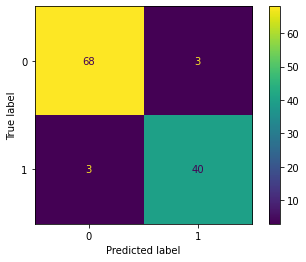

In [73]:
from xgboost import XGBClassifier

"""
Implemting the XGBoost algorithm. 
XGBoost is a gradient boosting algorithm that uses decision trees to train the model.
XGBoost is an ensemble learning algorithm meaning that it combines the results of many models, called base learners to make a prediction.
Just like in Random Forests, XGBoost uses Decision Trees as base learners. 
"""

xgb = XGBClassifier(use_label_encoder=False, learning_rate=0.1, n_estimators=100, max_depth=5)
#learning_rate is the learning rate of the gradient descent algorithm
#use_label_encoder is a boolean that indicates whether to use the label encoder or not

xgb.fit(X_train, y_train)
pred_xbg = xgb.predict(X_test)
print(accuracy_score(y_test, pred_xbg))

cm = confusion_matrix(y_test, pred_xbg, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb.classes_)
disp.plot()


In [ ]:
""" using grid search to find the best parameters for the Xgb model. 
grid search is a method that tries different combinations of parameters to find the best one. Here we are trying to find the best parameters for the XGBoost model.
We will be using the GridSearchCV class from Scikit-learn which accepts possible values for desired hyperparameters and fits separate models on the given data for each combination of hyperparameters. 
"""

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
} 

from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = XGBClassifier(objective="binary:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=4, cv=2, scoring="roc_auc")

# Fit
_ = grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_)

"""
We can see that using the best parameters we got from the grid search, we get an accuracy of 0.993, improving our model a lot.
"""

print(grid_cv.best_score_)



0.956140350877193


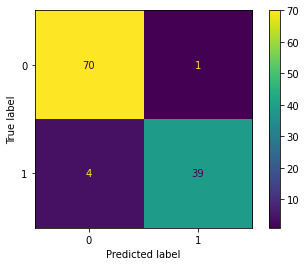

In [74]:
"""
Implementing Support Vector Machine.
Support Vector Machines are supervised learning models for classification and regression problems.
They can solve linear and non-linear problems and work well for many practical problems.
The idea of this model is to find a hyperplane that separates the data into two classes,
and then to classify new data points based on the distance to the hyperplane. 
The goal of the line is to maximizing the margin between the points on either side of the so called decision line (the hyperplane) 
so that the points on the one side of the line are more likely to be classified as belonging to the positive class, and the points on the other side are more likely to be classified as belonging to the negative class.
"""

from sklearn.svm import SVC #Support Vector Classifier 
sv = SVC(kernel='rbf', C=1, gamma=0.1)
#kernel is the type of kernel function to use in the algorithm. 
#C is the penalty parameter of the error term. 
#gamma is the parameter of the kernel function. 
sv.fit(X_train, y_train)
pred_svc = sv.predict(X_test) 


print(accuracy_score(y_test, pred_svc))

cm = confusion_matrix(y_test, pred_svc, labels=sv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=sv.classes_)
disp.plot()


In [ ]:
##implemnting grid search for the support vector machine algorithm 

grid_cv = GridSearchCV(estimator=sv, param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001, 0.00001], 'kernel': ['linear', 'rbf']},  scoring='accuracy', cv=10)
#scoring is the metric used to evaluate the model. 
grid_cv.fit(X_train, y_train)

print(grid_cv.best_params_) #the best parameters for the support vector machine algorithm
print(grid_cv.best_score_) #the best score for the support vector machine algorithm

In [75]:
"""
implemting naive bayes classifier. 
naive bayes classifier is a simple classifier that assumes that the features are independent of each other. 
A Naive Bayes classifier is a probabilistic machine learning model base on Bayes theorem.
"""

from sklearn.naive_bayes import GaussianNB 
naive = GaussianNB()
naive.fit(X_train, y_train)
pred_naive = naive.predict(X_test)
print(accuracy_score(y_test, pred_naive))

0.9649122807017544


In [84]:
"""
Implemtning Neural Network. 
Neural Networks are a type of artificial neural network, which is a type of artificial neural network that is based on the idea of a network of neurons.
The neurons are connected by a weight matrix, which is a matrix of weights that connect the neurons. 
each neuron is connected to all the other neurons in the network, and the weights are updated based on the error of the output of the neuron. 
each neuron has activation function, which is a function that maps the input to the output. 
we are going to use Neural Network for classification problems, however today Neural Network is used for both classification and regression problems.
we will be using the Keras library to implement the Neural Network. 
"""
#importing the Keras library
import keras
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

model = Sequential()

model.add(Dense(units=100, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

#relu is the rectified linear unit function, which is a function that returns the max of 0 and the input. 
#sigmod refers to the sigmoid function, which is a function that maps the input to the output. 

optemizer = keras.optimizers.Adam(lr=0.001) 
#lr is the learning rate, which is the step size of the gradient descent algorithm. 
#adam optimizer is a stochastic gradient descent algorithm. 

model.compile(optimizer=optemizer, loss='binary_crossentropy', metrics=['accuracy'])
#loss is the loss function, which is the function that measures the difference between the output and the expected output. 
#binary_crossentropy is the loss function for binary classification. 
#matrics is the list of metrics to be used to evaluate the model, which is the function that measures the performance of the model.

model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6471 - accuracy: 0.6353
Epoch 2/50
46/46 [==============================] - 0s 5ms/step - loss: 0.4143 - accuracy: 0.8520
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.2480 - accuracy: 0.9078
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.8955
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.9327
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1434 - accuracy: 0.9530
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9512
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1066 - accuracy: 0.9656
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.1134 - accuracy: 0.9606
Epoch 10/50
46/46 [==============================] - 0s 2ms/step - loss: 0.0817 - accuracy: 0.9781
Epoch 11/50
46/46 [

In [85]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f' Model loss on the test set: {loss}')
print(f' Model accuracy on the test set: {100*accuracy}')

4/4 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.9649
 Model loss on the test set: 0.06338843703269958
 Model accuracy on the test set: 96.49122953414917


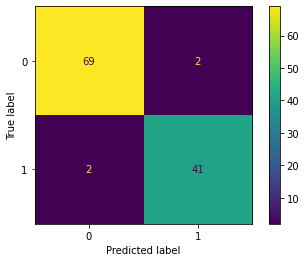

In [86]:
#predicting the test set 

pred_nn = model.predict(X_test) 
#plot the confusion matrix 
cm = confusion_matrix(y_test, pred_nn.round())
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [87]:
""" summary of the model """

summary = model.summary() #summary of the model
print(summary)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 100)               3200      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 13,401
Trainable params: 13,401
Non-trainable params: 0
_________________________________________________________________
None


In [89]:
"""_summary_
In this work, we have used the following libraries: 
1. pandas, which is a library for data manipulation and analysis. 
2. numpy, which is a library for scientific computing and high-level mathematical functions.
3. matplotlib, which is a library for plotting graphs.
4. seaborn, which is a library for statistical data visualization.
5. sklearn, uses the machine learning algorithms to train and test the model. 
6. keras, which is a library for building deep learning models.
7. tensorflow, deep learning library uses for building neural networks. 

First, we uses the pandas library to read the data and store it in a dataframe, then we uses the info and describe functions to get some information about the data. 
we learn and clean the data using descriptive statistics and visualizations (in this case, we use the seaborn and matplotlib library to plot the data).
We also uses preprocessing techniques such as scaling and normalization, we didnt need to use onehotencodeing because we didnt have any categorical variables (other then the target variable).
later on, we use the machine learning algorithms to train and test the model. 
The machine learning algorithms are used to train the model to predict the output of the data, in this case, the output is the class of the breast cancer classification.
All the models we use were classification models, since our traget variable is binary, and this is a classification problem.

We implement the following machine learning algorithms:

1. k-nearest neighbors (k-NN). this is a classification algorithm that uses the distance between the test data and the training data to predict the class of the test data. 
2. support vector machine (SVM). this is a classification algorithm that uses a linear decision boundary to predict the class of the test data. 
3. naive bayes classifier. this is a classification algorithm that uses a Gaussian distribution to predict the class of the test data. 
4. logistic regression. this is a classification algorithm that uses a logistic regression function to predict the class of the test data.
5. neural network. this is a algorithm that uses a neural network to predict the class of the test data.
6. random forest. this is a classification algorithm that uses a random forest to predict the class of the test data.
7. xgb (Extreme Gradient Boosting). this is a classification algorithm that uses a gradient boosting algorithm to predict the class of the test data. 


At the end of each algorithm, we plot the confusion matrix to evaluate the model.
"""

print("The scores of the models are:") 

print('Accuracy of k-nearest neighbors (k-NN): %.3f' % accuracy_score(y_test, pred_knn))
print('Accuracy of support vector machine (SVM): %.3f' % accuracy_score(y_test, pred_svc))
print('Accuracy of naive bayes classifier: %.3f' % accuracy_score(y_test, pred_naive))
print('Accuracy of logistic regression: %.3f' % accuracy_score(y_test, pred_lr))
print('Accuracy of Random Forest: %.3f' % accuracy_score(y_test, pred_rf))
print('Accuracy of XGB: %.3f' % accuracy_score(y_test, pred_xbg))
print('Accuracy of neural network: %.3f' % accuracy_score(y_test, pred_nn.round()))


The scores of the models are:
Accuracy of k-nearest neighbors (k-NN): 0.974
Accuracy of support vector machine (SVM): 0.956
Accuracy of naive bayes classifier: 0.965
Accuracy of logistic regression: 0.982
Accuracy of Random Forest: 0.965
Accuracy of XGB: 0.947
Accuracy of neural network: 0.965
